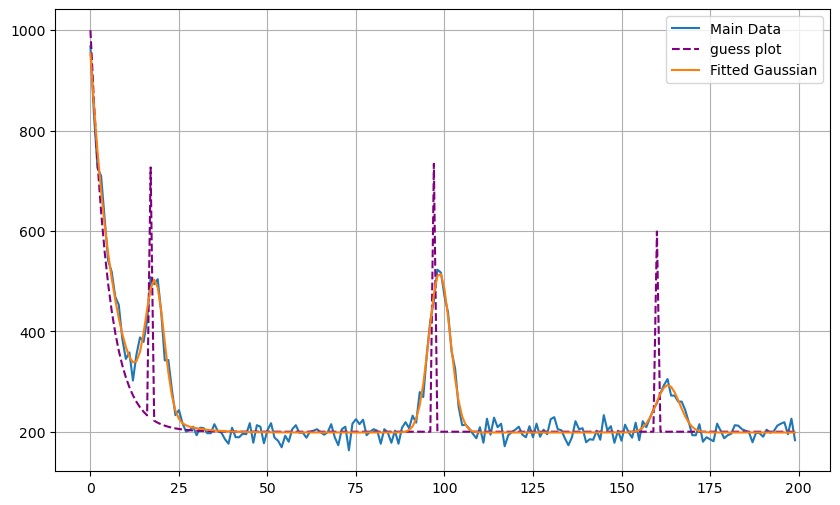

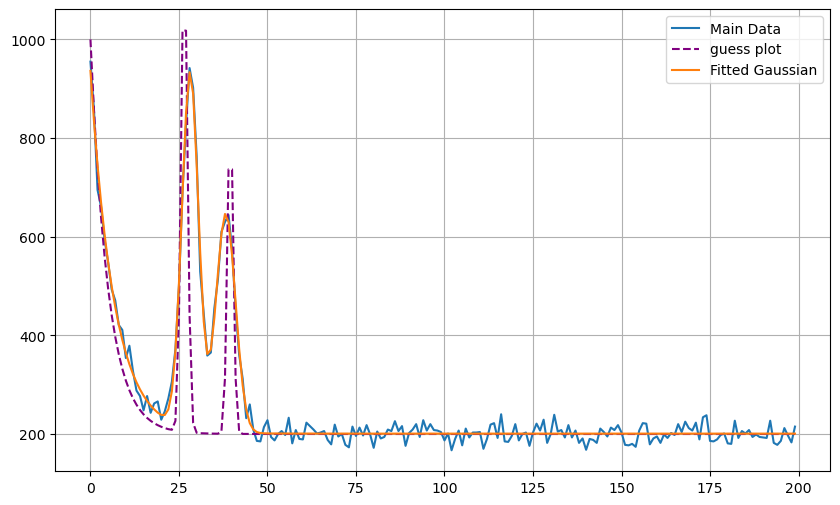

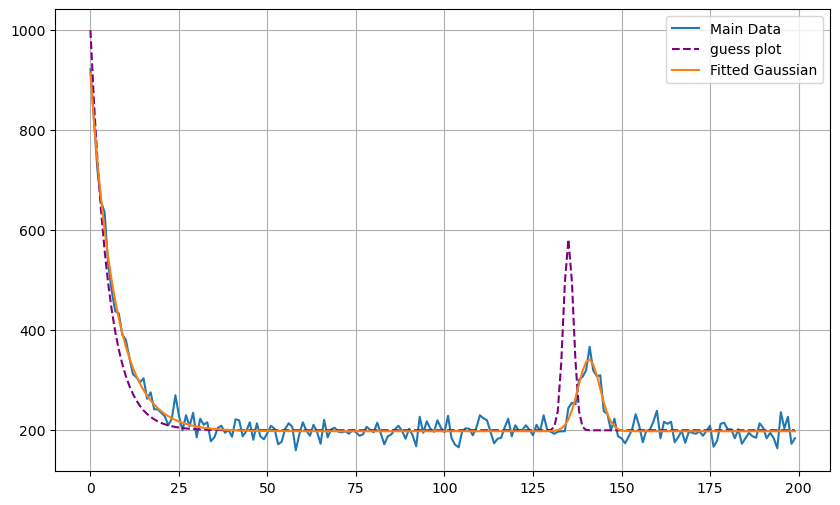

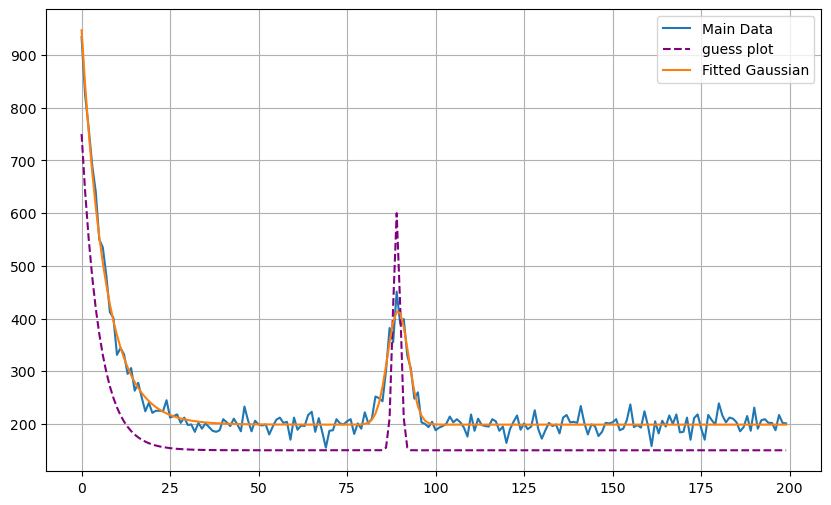

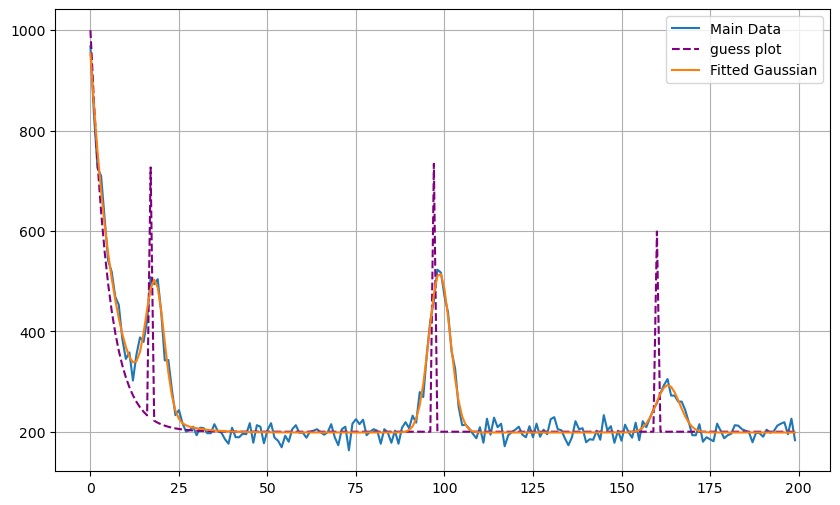

In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

 # Initial guesses for the coefficient of exponential functions and gaussians
a1 = [200, 800, 0.2, 500, 17, 0.2, 534, 97, 0.2, 399, 160, 0.2] 
# Define a Gaussian function for fitting
def G1(x, *a):
    return (a[0] + a[1]* np.exp(-a[2]* x) + 
            a[3] * np.exp(-(x - a[4])** 2 / (2 * a[5] ** 2)) +  
            a[6]* np.exp(-(x - a[7])** 2 / (2 * a[8] ** 2)) +  
            a[9]* np.exp(-(x - a[10])** 2 / (2 * a[11]** 2)))

# function for spectrum 2 
a2 = [ 200, 800, 0.2, 950, 26.5, 0.9, 652, 39.5, 0.8]
def G2(x, *a):
    return (a[0] + a[1] * np.exp(-a[2] * x) + 
            a[3] * np.exp(-(x - a[4]) ** 2 / (2 * a[5] ** 2)) +  
            a[6] * np.exp(-(x - a[7]) ** 2 / (2 * a[8] ** 2)))

a3 = [200, 800, 0.2, 382, 135, 1.4] # initial gues for spectrum 3
a4 = [150, 600, 0.2, 450, 89, 1] 

# function for spectrum 3, 4
def G3(x, *a):
    return (a[0] + a[1] * np.exp(-a[2] * x) +  
            a[3] * np.exp(-(x - a[4]) ** 2 / (2 * a[5] ** 2)))
    

# function that takes file name and fuctions to be optimized and initial guesses        
def curve_fitting_spectrums(file_name, f, a):  
    path = "/home/comfort/Desktop" # directory for spectrum files
    file_path = os.path.join(path, file_name) # joins spectrum files and file name
    data = pd.read_csv(file_path) 
    
    # x and y variables:
    x, y = data.iloc[:, 0], data.iloc[:, 1]

    
    # Perform curve fitting
    curve = curve_fit(f, x, y, p0=a)

   # plots:
    plt.figure(figsize=(10, 6))
    
    plots = [plt.plot(x, y, label='Main Data'), plt.plot(x,f(x, *a),color = 'purple', linestyle= '--', label= "guess plot")] # Initialize plots list with main data plot
    plots.append(plt.plot(x, f(x, *curve[0]), label='Fitted Gaussian')) # Plot combines peak plots:

    plt.legend()
    plt.grid(True)
    plt.savefig('tut_p1_s1.png')
    plt.show()
    return curve, plots

# feeding the spectrum data, functions, initial_guess into curve_fitting_spectrums functions to determine the optimized parameters
curve1, plot1 = curve_fitting_spectrums("tut5_spectrum1.csv",G1, a1 ) 
curve2, plot2 = curve_fitting_spectrums("tut5_spectrum2.csv",G2, a2 )
curve3, plot3 = curve_fitting_spectrums("tut5_spectrum3.csv",G3, a3)
curve4, plot4 = curve_fitting_spectrums("tut5_spectrum4.csv",G3, a4)
curve1, plot1 = curve_fitting_spectrums("tut5_spectrum1.csv",G1, a1 )


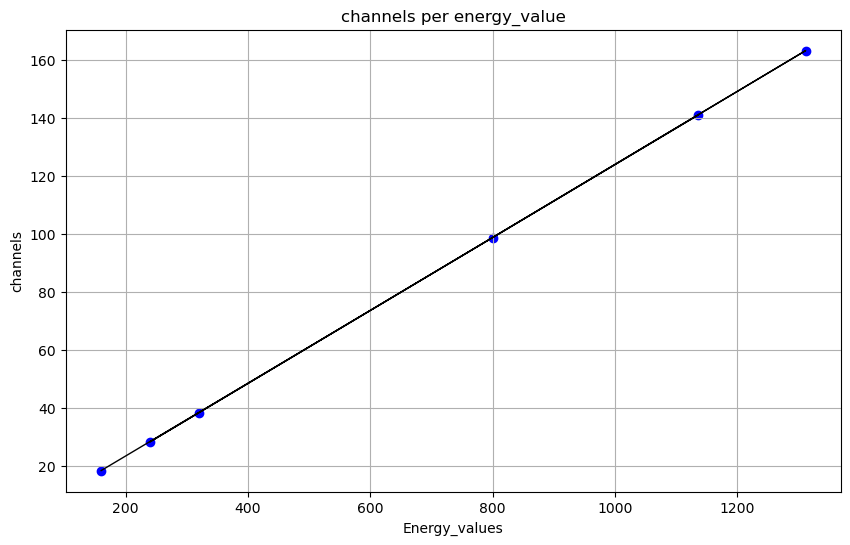

In [18]:
# part 2:    
# defining dependent{channels} and independent{Energy} variables:
Energy_val = [160, 800, 1312, 240, 320, 1136] # Energy values in the list for plot

# storing mu from optimized parameters for plot:
mu_channels = np.array([curve1[0][4],  curve1[0][7], curve1[0][10], curve2[0][4], curve2[0][7], curve3[0][4], curve4[0][4] ])    
# plotting best gaussian mean for curve fits vs Energy value:
plt.figure(figsize=(10, 6))
plt.scatter(Energy_val, mu_channels[:6], color = "b", linewidth = 1)
plt.plot(Energy_val, mu_channels[:6], color = "black", linewidth = 1)
plt.title("channels per energy_value")
plt.xlabel("Energy_values")
plt.ylabel("channels")
plt.grid(True)
plt.savefig('tut_p2_mkfman002.png') 
plt.show()

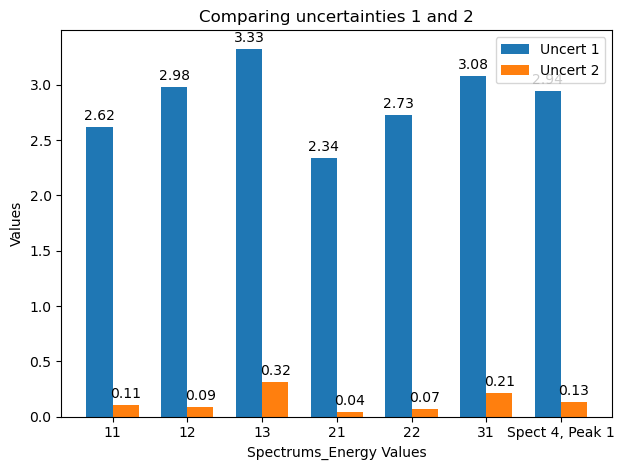

In [19]:

#part 3:

# computing uncertainty 1 and 2 respectively
# Calculate uncertainties for spectrum 1 to spectrum 4
uncert_2_spectrum_1 = np.sqrt(np.diag(curve1[1]))
uncert_2_spectrum_2 = np.sqrt(np.diag(curve2[1]))
uncert_2_spectrum_3 = np.sqrt(np.diag(curve3[1]))
uncert_2_spectrum_4 = np.sqrt(np.diag(curve4[1]))

# Calculate uncertainty for uncert_1
uncert_1 = np.array([curve1[0][5], curve1[0][8], curve1[0][11], curve2[0][5], curve2[0][8], curve3[0][5], curve4[0][5] ]) 

# Extract relevant uncertainties
uncertainty_2 = np.array([
    uncert_2_spectrum_1[4], uncert_2_spectrum_1[7], uncert_2_spectrum_1[10],
    uncert_2_spectrum_2[4], uncert_2_spectrum_2[7],
    uncert_2_spectrum_3[4],
    uncert_2_spectrum_4[4]
])

# Define labels for spectrums
spectrums = [11, 12, 13, 21, 22, 31, "Spect 4, Peak 1"]

# Define bar width
bar_width = 0.35

# Create array of evenly spaced values for bar positions
x = np.arange(len(spectrums))

# Plotting
bars1 = plt.bar(x - bar_width/2, uncert_1, bar_width, label='Uncert 1')
bars2 = plt.bar(x + bar_width/2, uncertainty_2, bar_width, label='Uncert 2')

# Customize plot
plt.xlabel('Spectrums_Energy Values')
plt.ylabel('Values')
plt.title('Comparing uncertainties 1 and 2')
plt.xticks(x, spectrums)  # Replace x ticks with categories
plt.legend()

# Function to add text labels on top of each bar
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{:.2f}'.format(height),  # Format height to two decimal places
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),  # 3 points vertical offset
                     textcoords="offset points",
                     ha='center', va='bottom')

# Add text labels for both sets of bars
add_labels(bars1)
add_labels(bars2)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.savefig('tut_3_mkfman002.png') 
plt.show()

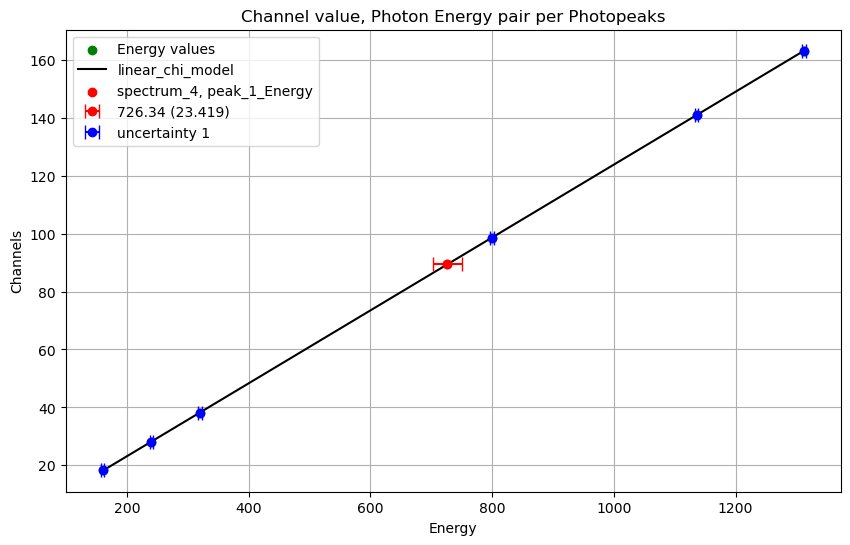

In [20]:
# part 4:
    
# x and y values(function inputs):
y_uncer = np.array(uncert_1)[:6] # uncertainty
x_ = np.array(Energy_val) # corresponding energy values
y_ = np.array(mu_channels[:6]) # channels


def linear_chi_constants(x,y):
   
    # compute standard deviation:
    std_y = np.std(y_uncer)**2
    
    # Denominator:
    D = np.mean(1/std_y)*np.mean(x_*x_/std_y) - np.mean(x_/std_y)**2
    
    # compute numerators of a_0 and a_1
    a_0_Num = np.mean(y/std_y)*np.mean(x_*x_/std_y) - np.mean(x_/std_y)*np.mean(x_*y_/std_y)
    
    a_1_Num = np.mean(1/std_y)*np.mean(x_*y_/std_y) - np.mean(x_/std_y)*np.mean(y_/std_y)

    # compute a_0 and a_1:
    a_0 = a_0_Num/ D
    
    a_1 = a_1_Num/ D
    
    #compute the gradient:
    m = (y_[0]-y_[-1])/(x_[0]-x_[-1])
    
    return a_0, a_1

# Defining a function for determing uncertainties associated with Energy values:


# x values for plotting the model:
x_model = np.linspace(min(x_), max(x_),100) # array from x.min() to x.max()
# compute a_o, a_1 constants with x, y



a_0, a_1 = linear_chi_constants(x_, y_)

# Determining the unknown energy of spectrum 4: 
spectrum4_Energy = - a_0/a_1 + mu_channels[-1]/a_1

#updating energy values:
updated_energy_val = np.array([160, 800, 1312, 240, 320, 1136, spectrum4_Energy])

# uncertanties of all energy values:
uncertainties = []
for i in uncert_1:
    uncertainties.append(i/m)
    
uncertainties_array = np.array(uncertainties)
    
# plot Data points:
plt.figure(figsize=(10, 6))
plt.scatter(x_,y_, color = "green", label = "Energy values")
plt.plot(x_model, a_0 + a_1*x_model, color = "black", label = "linear_chi_model")
plt.scatter(spectrum4_Energy, mu_channels[-1], color = "red", label = "spectrum_4, peak_1_Energy")

#plotting uncertainty of determined Energy of spectrum 4:
plt.errorbar(updated_energy_val[-1], mu_channels[-1], xerr=uncertainties_array[-1], fmt='o', capsize=5, color='red', label="726.34 (23.419)")
plt.errorbar(updated_energy_val[:6], mu_channels[:6], xerr=uncert_1[:6], fmt='o', capsize=5, color='blue', label="uncertainty 1")
plt.title("Channel value, Photon Energy pair per Photopeaks")
plt.xlabel("Energy")
plt.ylabel("Channels")
plt.grid(True)
plt.legend()
plt.savefig('tut_p4_mkfman002.png') 
plt.show()